In [14]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.linear_model import LinearRegression

In [68]:
df = pd.read_csv('../../data/by_student_group/grocery_added.csv',low_memory=False)

df.drop(columns=['Unnamed: 0','National School Lunch Program [Public School] 2020-21',
                'County Name_y','District Name_y', 'School Name_y','CDS',"No. of Service Days Req'd"],inplace=True)
df.rename(columns ={'County Name_x':'County_Name','District Name_x':'District_Name',
                    
                    'School Name_x':'School_Name',
'Total Students, All Grades (Excludes AE) [Public School] 2020-21':'Total_Students(No-AE)',
'Total Students, All Grades (Includes AE) [Public School] 2020-21':'Total_Students(With-AE)',
'Grades 1-8 Students [Public School] 2020-21':'1-8th_Students',
    'Pupil/Teacher Ratio [Public School] 2020-21':'Pupil/Teacher-Ratio',
       'Grades 9-12 Students [Public School] 2020-21':'9-12_Students',
        'Full-Time Equivalent (FTE) Teachers [Public School] 2020-21':'FTE_Teachers',
                    'Hispanic - male [Public School] 2020-21':'Hispanic_Male',
       'Hispanic - female [Public School] 2020-21':'Hispanic_Female',
       'Black or African American - male [Public School] 2020-21':'Black_or_AA_M',
       'Black or African American - female [Public School] 2020-21':'Black_or_AA_F',},inplace=True)
df.shape

(316683, 96)

In [69]:

df[['Total_Students(No-AE)',
       'Total_Students(With-AE)', '1-8th_Students', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
    
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F']] =df[['Total_Students(No-AE)',
                                                                  
                                                               
       'Total_Students(With-AE)', '1-8th_Students', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F']].apply(pd.to_numeric,errors='coerce')

In [70]:
dfe= df[df['Grade']==11]

In [72]:
dfe[['County Code', 'District Code', 'School Code', 'Student Group ID',
    'Distrtict Name', 'uniq_ID', 'Avg_21', 'Co', 'LEA',
       'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10',
      '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365',
       'Current\nExpense ADA', 'Current\nExpense Per ADA', 'LEA Type',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Grocery_3mile', 'Grocery_dist']].sample(5)

,County Code,District Code,School Code,Student Group ID,Distrtict Name,uniq_ID,Avg_21,Co,LEA,Total Salary Schedule FTE,...,% Salary Change Over 2019–20,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,LEA Type,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov,Grocery_3mile,Grocery_dist
78695,19,64725,1937176,53,long beach unified,2001920,599468.0,19.0,long beach unified,3169.00,...,3.02,9.111493e+08,68158.53,13368.089509,Unified,517834.0,80082.0,13425.0,50.0,1648.0
153719,33,67082,3330537,160,hemet unified,3397652,370486.0,33.0,hemet unified,993.80,...,2.00,2.902030e+08,20513.74,14146.760322,Unified,151453.0,25182.0,4784.0,27.0,3099.0
138318,30,66621,3035409,29,orange unified,3102060,916846.0,30.0,orange unified,1167.58,...,2.00,3.116640e+08,23846.18,13069.768276,Unified,230443.0,34962.0,2799.0,50.0,2012.0
95145,19,64733,1932987,142,los angeles unified,1997739,730075.0,19.0,los angeles unified,27043.00,...,0.00,7.956466e+09,455015.03,17486.161847,Unified,4597582.0,680805.0,129365.0,50.0,591.0
212875,39,68593,116376,90,manteca unified,185008,572747.0,39.0,manteca unified,1155.00,...,0.00,2.632408e+08,22687.73,11602.780456,Unified,130846.0,27174.0,3566.0,14.0,1369.0


In [73]:
dfe.columns

Index(['County Code', 'District Code', 'School Code', 'Student Group ID',
       'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'County_Name', 'District_Name', 'School_Name', 'Zip_Code',
 

In [ ]:
pandas.Series(df['id'], dtype="string")

In [43]:
strs = pd.Series(dfe['Zip_Code'], dtype="string")
dfe['Zip_Code'] = strs
dfe['Zip_Code'].sample(5)

<ipython-input-43-5f49bd95cdcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Zip_Code'] = strs


152984    92201.0
294174    93274.0
2242      94538.0
22365     95623.0
141709       <NA>
Name: Zip_Code, dtype: string

In [74]:
dfe['County Code'].sample(5)

133973    30
64730     19
250208    43
172535    34
122024    23
Name: County Code, dtype: int64

In [ ]:
'Co' needs to be a string 

In [44]:
dfe['Zip_Code'].isnull().sum()

3575

In [45]:
dfe.select_dtypes('string').columns

Index(['Zip_Code'], dtype='object')

In [27]:
dfe.select_dtypes('int').columns

Index(['County Code', 'District Code', 'School Code', 'Student Group ID',
       'Grade', 'Demographic ID Num', 'uniq_ID'],
      dtype='object')

In [46]:
dfe.select_dtypes(float).columns

Index(['Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard', 'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard', 'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard', 'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard', 'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard', 'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard', 'Unnamed: 0_y', 'FRPM School Code',
       'Enrollment', 'Free_Meal_count', 'Percent_Eligible', 'FRPM_Count',
       'Percent_Eligible_FRPM', 'Enrollment.1', 'Fr

In [30]:
df['CDS'].value_counts()

64733.0    13022
67314.0    10999
64725.0     8584
68585.0     6479
69666.0     5067
           ...  
63305.0       14
71993.0       13
67124.0       12
71795.0       12
75218.0       11
Name: CDS, Length: 446, dtype: int64

In [11]:
df.Grade.value_counts()

11    56794
5     49377
4     48935
3     48073
6     41637
8     35958
7     35909
Name: Grade, dtype: int64

In [13]:

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [75]:
dfe.columns

Index(['County Code', 'District Code', 'School Code', 'Student Group ID',
       'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'County_Name', 'District_Name', 'School_Name', 'Zip_Code',
 

In [78]:
dfe[['Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level',

'Students Enrolled', 'Students Tested', 
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',

 'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM', 'Enrollment.1',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'FRPM_Count.1',
 
 'Latitude', 'Longitude',
 
'Total_Students(No-AE)',
       'Total_Students(With-AE)', '1-8th_Students', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
      'Avg_21', 
       'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExpense ADA',
       'Current\nExpense Per ADA', 'LEA Type', 'Estimated Total Population',
       'Estimated Population 5-17', 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist'
]]= dfe[['Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level',

'Students Enrolled', 'Students Tested', 
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',

 'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM', 'Enrollment.1',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'FRPM_Count.1',
 
 'Latitude', 'Longitude',
 
'Total_Students(No-AE)',
       'Total_Students(With-AE)', '1-8th_Students', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
      'Avg_21', 
       'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExpense ADA',
       'Current\nExpense Per ADA', 'LEA Type', 'Estimated Total Population',
       'Estimated Population 5-17', 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist'
]].apply(pd.to_numeric,errors='coerce')

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [150]:
check = dfe[['District Code','County Code','Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level',

'Students Enrolled', 'Students Tested', 
     

 'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM', 'Enrollment.1',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'FRPM_Count.1',
 
 'Latitude', 'Longitude',
 
'Total_Students(No-AE)',
       'Total_Students(With-AE)', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
      'Avg_21', 
       'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExpense ADA',
       'Current\nExpense Per ADA', 'Estimated Total Population',
       'Estimated Population 5-17', 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist'
]]

In [151]:
m = pd.DataFrame([check.isnull().sum(),100*check.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(20)

,count,%
Black_or_AA_F,16347.0,28.782970
Asian or Asian/Pacific Islander - female [Public School] 2020-21,15903.0,28.001197
Black_or_AA_M,15848.0,27.904356
Asian or Asian/Pacific Islander - male [Public School] 2020-21,15604.0,27.474733
Pupil/Teacher-Ratio,13323.0,23.458464
Hispanic_Male,13279.0,23.380991
Hispanic_Female,13279.0,23.380991
9-12_Students,13279.0,23.380991
Total_Students(With-AE),13279.0,23.380991
Total_Students(No-AE),13279.0,23.380991


In [127]:
m = pd.DataFrame([check.isnull().sum(),100*check.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.tail(10)


,count,%
Highest Salary Offered,46.0,0.080994
Highest Entry Level Step,46.0,0.080994
Average Salary Paid,46.0,0.080994
Lowest Salary Offered,46.0,0.080994
Total Tested at Reporting Level,0.0,0.000000
Total Tested with Scores at Reporting Level,0.0,0.000000
Students Enrolled,0.0,0.000000
Students Tested,0.0,0.000000
County Code,0.0,0.000000
District Code,0.0,0.000000


In [117]:
cols = check.columns 

In [152]:

for i in cols:
    check[i] = check[i].fillna(check.groupby(['District Code'])[i].transform('mean'))
for i in cols:
    check[i] = check[i].fillna(check.groupby(['County Code'])[i].transform('mean'))


<ipython-input-152-8c77f2f69cbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[i] = check[i].fillna(check.groupby(['District Code'])[i].transform('mean'))
<ipython-input-152-8c77f2f69cbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[i] = check[i].fillna(check.groupby(['County Code'])[i].transform('mean'))


In [153]:
m = pd.DataFrame([check.isnull().sum(),100*check.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(20)

,count,%
Black_or_AA_M,273.0,0.480685
Black_or_AA_F,266.0,0.468359
Asian or Asian/Pacific Islander - male [Public School] 2020-21,99.0,0.174314
Hispanic_Male,81.0,0.142621
Latitude,81.0,0.142621
Hispanic_Female,81.0,0.142621
Pupil/Teacher-Ratio,81.0,0.142621
FTE_Teachers,81.0,0.142621
9-12_Students,81.0,0.142621
Total_Students(With-AE),81.0,0.142621


In [154]:
check = check.dropna(how='any',axis=0)
check

,District Code,County Code,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Students Enrolled,Students Tested,Enrollment,Free_Meal_count,Percent_Eligible,FRPM_Count,...,2020–21 P‑2 ADA,% Salary Change Over 2019–20,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov,Grocery_3mile,Grocery_dist
19,10017,1,108.0,106.0,94.0,62.0,411.000000,230.000000,0.559611,277.0000,...,18860.292764,3.017373,2.857007e+08,18835.046896,13998.450902,184134.97884,26713.57813,3044.345812,50.000000,1372.000000
20,10017,1,56.0,56.0,45.0,30.0,411.000000,230.000000,0.559611,277.0000,...,18860.292764,3.017373,2.857007e+08,18835.046896,13998.450902,184134.97884,26713.57813,3044.345812,50.000000,1372.000000
21,10017,1,52.0,50.0,49.0,32.0,411.000000,230.000000,0.559611,277.0000,...,18860.292764,3.017373,2.857007e+08,18835.046896,13998.450902,184134.97884,26713.57813,3044.345812,50.000000,1372.000000
22,10017,1,93.0,91.0,75.0,51.0,411.000000,230.000000,0.559611,277.0000,...,18860.292764,3.017373,2.857007e+08,18835.046896,13998.450902,184134.97884,26713.57813,3044.345812,50.000000,1372.000000
23,10017,1,24.0,24.0,28.0,22.0,411.000000,230.000000,0.559611,277.0000,...,18860.292764,3.017373,2.857007e+08,18835.046896,13998.450902,184134.97884,26713.57813,3044.345812,50.000000,1372.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314490,72736,58,27.0,27.0,48.0,16.0,803.914773,481.642045,0.578271,514.3125,...,9148.420000,0.000000,1.159610e+08,9148.960000,12674.772253,65111.00000,12644.00000,2570.000000,31.090909,3168.289773
314491,72736,58,17.0,17.0,38.0,11.0,803.914773,481.642045,0.578271,514.3125,...,9148.420000,0.000000,1.159610e+08,9148.960000,12674.772253,65111.00000,12644.00000,2570.000000,31.090909,3168.289773
314492,72736,58,27.0,27.0,48.0,16.0,803.914773,481.642045,0.578271,514.3125,...,9148.420000,0.000000,1.159610e+08,9148.960000,12674.772253,65111.00000,12644.00000,2570.000000,31.090909,3168.289773
314493,72736,58,27.0,27.0,48.0,16.0,803.914773,481.642045,0.578271,514.3125,...,9148.420000,0.000000,1.159610e+08,9148.960000,12674.772253,65111.00000,12644.00000,2570.000000,31.090909,3168.289773


In [155]:
check.columns

Index(['District Code', 'County Code', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM', 'Enrollment.1',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'FRPM_Count.1', 'Latitude',
       'Longitude', 'Total_Students(No-AE)', 'Total_Students(With-AE)',
       '9-12_Students', 'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
       'Avg_21', 'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExp

In [144]:
c.describe()

,est_num_u17_pov,Grocery_3mile
count,56748.000000,56794.000000
mean,19049.545885,36.032553
std,41511.773343,17.878095
min,4.000000,0.000000
25%,717.000000,20.000000
50%,2252.000000,49.300466
75%,5133.000000,50.000000
max,129365.000000,50.000000


In [156]:
check.replace([np.inf, -np.inf], np.nan, inplace=True)

In [158]:
m = pd.DataFrame([check.isnull().sum(),100*check.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(20)

,count,%
District Code,0.0,0.0
Hispanic_Female,0.0,0.0
Black_or_AA_F,0.0,0.0
Asian or Asian/Pacific Islander - male [Public School] 2020-21,0.0,0.0
Asian or Asian/Pacific Islander - female [Public School] 2020-21,0.0,0.0
Avg_21,0.0,0.0
Total Salary Schedule FTE,0.0,0.0
Lowest Salary Offered,0.0,0.0
Average Salary Paid,0.0,0.0
Highest Entry Level Step,0.0,0.0


In [162]:
c = check[[ 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM', 'Enrollment.1',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'FRPM_Count.1', 'Latitude',
       'Longitude', 'Total_Students(No-AE)', 'Total_Students(With-AE)',
       '9-12_Students', 'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
       'Avg_21', 'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExpense ADA',
       'Current\nExpense Per ADA', 'Estimated Total Population',
       'Estimated Population 5-17', 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist'
    ]]

In [165]:
vif_df= calculate_vif(c,c.columns.values)
vif_df

<ipython-input-13-bc35396fd443>:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])
<ipython-input-13-bc35396fd443>:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])


In [166]:
vif_df

,VIF,Tolerance
Total Tested at Reporting Level,8.408992e+03,0.000119
Total Tested with Scores at Reporting Level,8.368322e+03,0.000119
Students Enrolled,2.830088e+00,0.353346
Students Tested,3.421783e+00,0.292245
Enrollment,4.751777e+03,0.000210
Free_Meal_count,4.718338e+04,0.000021
Percent_Eligible,4.566976e+01,0.021896
FRPM_Count,5.312244e+04,0.000019
Percent_Eligible_FRPM,3.746487e+01,0.026692
Enrollment.1,4.714890e+03,0.000212


In [172]:
c = check[[ 
       'Total Tested with Scores at Reporting Level', 
  'Free_Meal_count', 
     
   
           'Latitude',
       'Longitude',
        
       '9-12_Students',  'Pupil/Teacher-Ratio', 'Hispanic_Male',
    'Black_or_AA_M', 
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
  
       
           'Avg_21', 
    'Total Salary Schedule FTE', 
       'Average Salary Paid', 
      
           'Salary at BA+60 Step 10', 
       '% Salary Change Over 2019–20', 'EDP 365', 
      'Estimated Total Population',
    'Grocery_3mile',
      
    ]]

In [173]:
vif_df= calculate_vif(c,c.columns.values)
vif_df

,VIF,Tolerance
Total Tested with Scores at Reporting Level,1.022324,0.978164
Free_Meal_count,1.879729,0.531992
Latitude,12.739287,0.078497
Longitude,11.573375,0.086405
9-12_Students,6.148706,0.162636
Pupil/Teacher-Ratio,1.512725,0.661059
Hispanic_Male,4.925896,0.203009
Black_or_AA_M,1.452741,0.688354
Asian or Asian/Pacific Islander - male [Public School] 2020-21,2.368055,0.422288
Avg_21,2.053324,0.487015


In [176]:
c = check[[ 
       'Total Tested with Scores at Reporting Level', 
  'Free_Meal_count', 
     
   
           'Latitude',
#        'Longitude',
        
       '9-12_Students', 
    'Pupil/Teacher-Ratio',
    'Hispanic_Male',
    'Black_or_AA_M', 
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
  
       
           'Avg_21', 
#     'Total Salary Schedule FTE', 
       'Average Salary Paid', 
      
#            'Salary at BA+60 Step 10', 
       '% Salary Change Over 2019–20', 'EDP 365', 
#       'Estimated Total Population',
    'Grocery_3mile',
    'Grocery_dist'
      
    ]]

In [177]:
vif_df= calculate_vif(c,c.columns.values)
vif_df

,VIF,Tolerance
Total Tested with Scores at Reporting Level,1.016831,0.983448
Free_Meal_count,1.867465,0.535485
Latitude,1.545257,0.647142
9-12_Students,5.860601,0.170631
Pupil/Teacher-Ratio,1.509298,0.662560
Hispanic_Male,4.653379,0.214898
Black_or_AA_M,1.367701,0.731154
Asian or Asian/Pacific Islander - male [Public School] 2020-21,2.204194,0.453681
Avg_21,1.648745,0.606522
Average Salary Paid,1.950321,0.512736


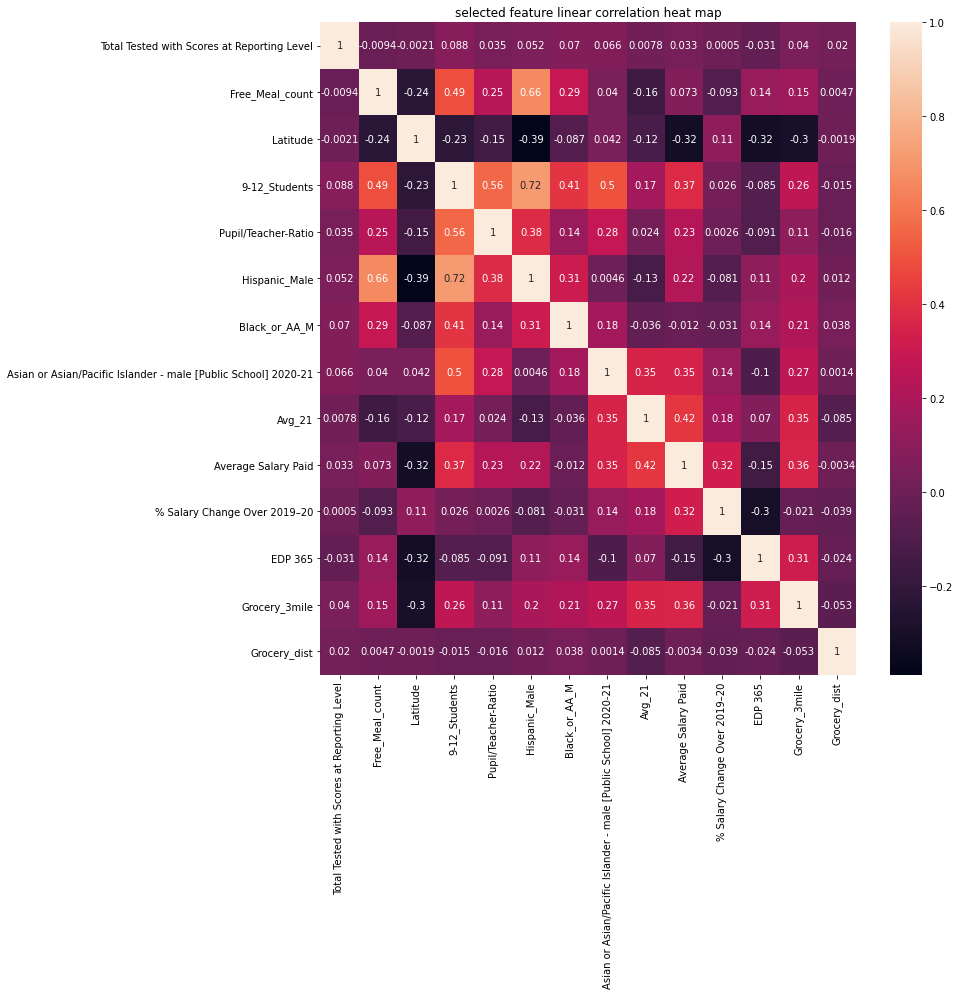

In [180]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sns.heatmap(c.corr(),annot=True)
plt.title('selected feature linear correlation heat map')
plt.show()

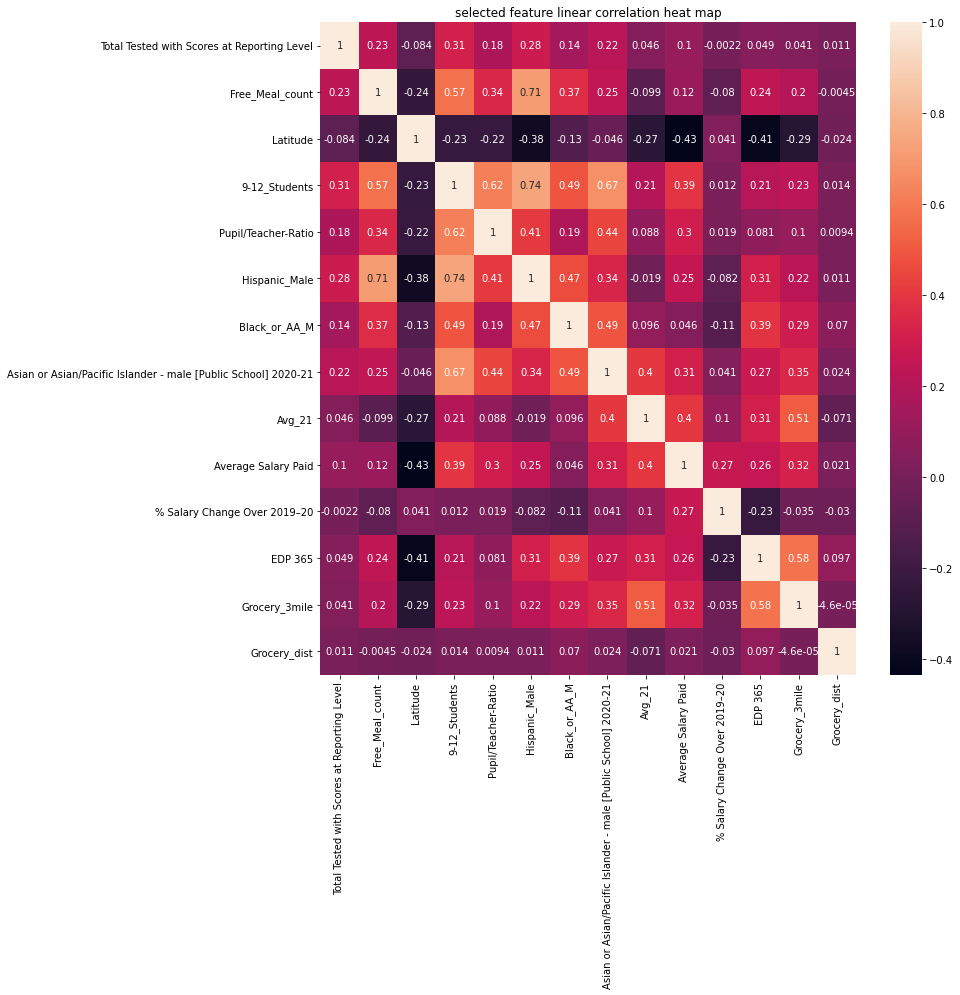

In [181]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sns.heatmap(c.corr(method='spearman'),annot=True)
plt.title('selected feature linear correlation heat map')
plt.show()

In [182]:
import ppscore as pps
pps.score(df, "MBA_Grade", "workex")


In [185]:
pps.score(dfe,'Avg_21','Mean Scale Score')

{'x': 'Avg_21',
 'y': 'Mean Scale Score',
 'ppscore': 0.19085916302819284,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 61.759739999999994,
 'model_score': 49.97232771476119,
 'model': DecisionTreeRegressor()}

In [186]:
pps.score(dfe,'Latitude','Mean Scale Score')

{'x': 'Latitude',
 'y': 'Mean Scale Score',
 'ppscore': 0.36698115957565447,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 62.7035,
 'model_score': 39.69249686054795,
 'model': DecisionTreeRegressor()}

In [187]:
pps.score(dfe,'Longitude','Mean Scale Score')

{'x': 'Longitude',
 'y': 'Mean Scale Score',
 'ppscore': 0.3712642647289981,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 62.7035,
 'model_score': 39.42393117656527,
 'model': DecisionTreeRegressor()}

In [191]:
matrix = pps.matrix(c)
sns.heatmap(matrix)

ValueError: could not convert string to float: 'Total Tested with Scores at Reporting Level'